In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from dotenv import load_dotenv

In [9]:
load_dotenv()
csv_path = os.getenv('PATHW')

df = pd.read_csv(csv_path,encoding='latin1')

In [10]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 1. Data Understanding and Preparation

#### 1.1 Data Exploration

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

<Axes: >

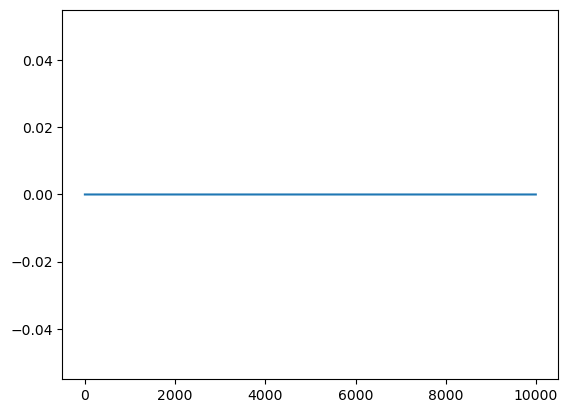

In [12]:
df.isnull().sum(axis=1).plot()

No Null values

<Axes: >

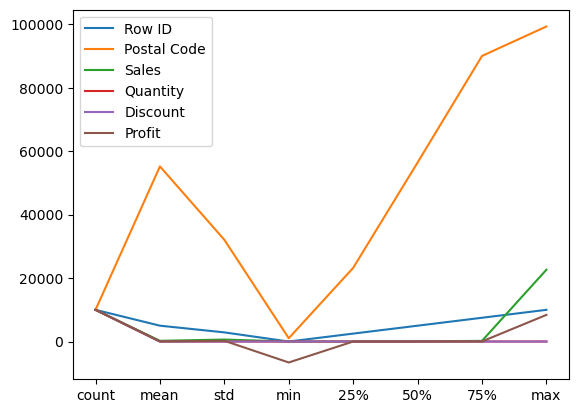

In [13]:
df.describe().plot()

#### Profit has negative value

In [12]:
negative_profit_mask = df['Profit'] < 0

negative_profits = df[negative_profit_mask]
negative_profits['Profit']


3       -383.0310
14      -123.8580
15        -3.8160
23        -1.0196
27     -1665.0522
          ...    
9920     -35.8176
9921      -4.5936
9931     -40.1960
9937      -1.7772
9962     -67.6704
Name: Profit, Length: 1871, dtype: float64

In [13]:
num_negative_profits = negative_profit_mask.sum()
total_series = len(df)
percentage_negative_profits = (num_negative_profits / total_series) * 100

print(f"\nNumber of Negative Profit Entries: {num_negative_profits}")
print(f"Total Number of Entries: {total_series}")
print(f'Percentage Negative Profits: {percentage_negative_profits:.2f}%')


Number of Negative Profit Entries: 1871
Total Number of Entries: 9994
Percentage Negative Profits: 18.72%


### Further analysis for checking the reason for negative Profit

In [14]:
# Discount Percentage 
negative_profits['Discount_Percentage'] = (df['Discount'] / df['Sales']) * 100

avg_discount_neg = negative_profits['Discount_Percentage'].mean()
print(f"\nAverage Discount Percentage for Negative Profits: {avg_discount_neg:.2f}%")


Average Discount Percentage for Negative Profits: 5.53%


/tmp/ipykernel_496501/2782112406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_profits['Discount_Percentage'] = (df['Discount'] / df['Sales']) * 100


In [15]:
# Profit Margin
negative_profits['profit_margin'] = (df['Profit'] /df['Sales']) * 100

avg_profit_neg = negative_profits['profit_margin'].mean()

print(f"\nAverage Profit Margin for Negative Profits: {avg_profit_neg:.2f}%")


Average Profit Margin for Negative Profits: -62.46%


/tmp/ipykernel_496501/1862383723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_profits['profit_margin'] = (df['Profit'] /df['Sales']) * 100


##### For every dollar sales in these transactions, the business is incurring a loss of approximately 69.49 cents.

In [16]:
avg_profit_neg = df['profit_margin'].mean()

print(f"\nAverage Profit Margin for Negative Profits: {avg_profit_neg:.2f}%")

KeyError: 'profit_margin'

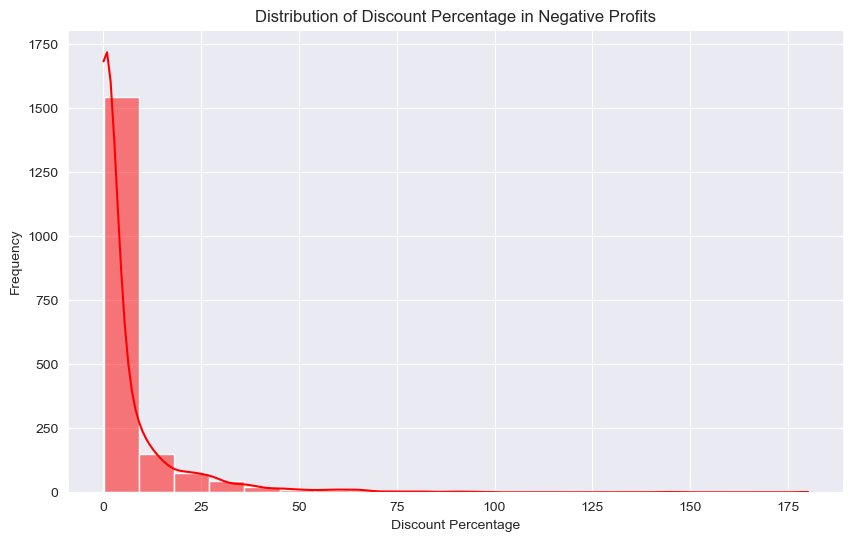

In [92]:
plt.figure(figsize=(10, 6))
sns.histplot(negative_profits['Discount_Percentage'], bins=20, kde=True, color='red')
plt.title('Distribution of Discount Percentage in Negative Profits')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()

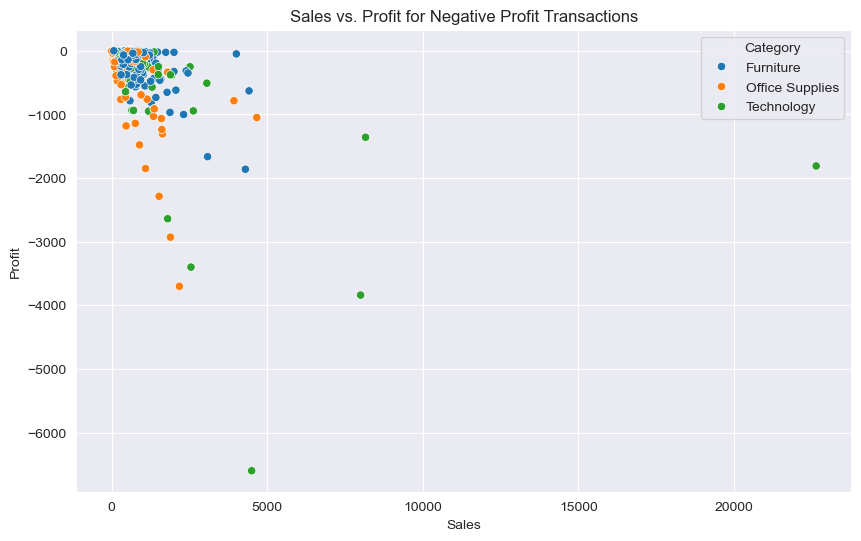

In [93]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=negative_profits, hue='Category')
plt.title('Sales vs. Profit for Negative Profit Transactions')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


In [94]:
# Identifying if high discounts correlated with negative profits.

high_discounts_neg = negative_profits[negative_profits['Discount_Percentage'] > 20]
print(f"\nNumber of Negative Profits with >20% Discounts: {len(high_discounts_neg)} ")
print(high_discounts_neg[['Order ID', 'Sales', 'Discount_Percentage', 'Profit']])


Number of Negative Profits with >20% Discounts: 164 
            Order ID  Sales  Discount_Percentage  Profit
15    US-2015-118983  2.544            31.446541 -3.8160
75    US-2017-118038  1.248            64.102564 -1.9344
101   CA-2016-158568  1.788            44.742729 -3.0396
126   US-2017-107272  2.388            29.313233 -1.8308
198   US-2017-124303  2.946            23.761032 -2.2586
...              ...    ...                  ...     ...
9479  CA-2014-126193  3.828            20.898642 -6.5076
9629  CA-2014-118192  3.438            20.360675 -2.5212
9795  CA-2016-125920  3.798            21.063718 -5.8869
9808  CA-2017-145093  2.112            37.878788 -3.3792
9869  CA-2014-114195  3.132            22.349936 -2.6100

[164 rows x 4 columns]


In [95]:
low_sales_neg = negative_profits[negative_profits['Sales'] < 50]  # Example threshold
print(f"\nNumber of Negative Profits with Sales < $50: {len(low_sales_neg)}")
print(low_sales_neg[['Order ID', 'Sales', 'Profit']])


Number of Negative Profits with Sales < $50: 829
            Order ID   Sales   Profit
15    US-2015-118983   2.544  -3.8160
28    US-2015-150630   9.618  -7.0532
32    US-2015-150630   6.858  -5.7150
75    US-2017-118038   1.248  -1.9344
76    US-2017-118038   9.708  -5.8248
...              ...     ...      ...
9870  CA-2014-114195  22.428 -17.9424
9877  US-2017-166324   8.700  -6.3800
9903  CA-2014-122609  25.128  -6.9102
9920  CA-2016-149272  22.386 -35.8176
9921  CA-2014-111360   5.742  -4.5936

[829 rows x 3 columns]


In [96]:
# Checking if certain categories or products are consistently generating negative profits
category_neg = negative_profits['Category'].value_counts()
print("\nNegative Profit by category: ")
print(category_neg)

product_neg = negative_profits['Product Name'].value_counts().head(10)
print("\n Top 10 Products with Negative Profit: ")
print(product_neg)


Negative Profit by category: 
Category
Office Supplies    886
Furniture          714
Technology         271
Name: count, dtype: int64

 Top 10 Products with Negative Profit: 
Product Name
Global Wood Trimmed Manager's Task Chair, Khaki                          12
KI Adjustable-Height Table                                               10
Global High-Back Leather Tilter, Burgundy                                10
Hon 61000 Series Interactive Training Tables                              9
Office Star - Contemporary Task Swivel chair with Loop Arms, Charcoal     8
Storex Dura Pro Binders                                                   8
Global Deluxe Steno Chair                                                 8
GBC Instant Report Kit                                                    8
Novimex Fabric Task Chair                                                 8
Staple remover                                                            8
Name: count, dtype: int64


In [97]:
# Analyzing if specific shipping modes are associated with negative profits.
shipping_neg = negative_profits['Ship Mode'].value_counts()
print("\nNegative Profit by Ship Mode:")
print(shipping_neg)


Negative Profit by Ship Mode:
Ship Mode
Standard Class    1173
Second Class       307
First Class        293
Same Day            98
Name: count, dtype: int64


In [98]:
# Investigation if certain regions are more prone to negative profit.

region_neg = negative_profits['Region'].value_counts()
print("\nNegative Profit by Region: ")
print(region_neg)


Negative Profit by Region: 
Region
Central    741
East       553
West       318
South      259
Name: count, dtype: int64


In [99]:
# Display a sample of negative profit transactions
sample_neg = negative_profits.sample(n=5, random_state=42)
print("\nSample Negative Profit Transactions:")
print(sample_neg)



Sample Negative Profit Transactions:
      Row ID        Order ID Order Date   Ship Date       Ship Mode  \
9103    9104  CA-2015-163181  11/7/2015  11/12/2015  Standard Class   
6767    6768  CA-2017-100615  4/20/2017   4/24/2017  Standard Class   
9937    9938  CA-2016-164889   6/3/2016    6/6/2016    Second Class   
1463    1464  CA-2016-152289  8/26/2016   8/28/2016     First Class   
2228    2229  CA-2016-139157  10/1/2016   10/5/2016  Standard Class   

     Customer ID   Customer Name    Segment        Country           City  \
9103    AB-10105   Adrian Barton   Consumer  United States        Houston   
6767    SJ-20215    Sarah Jordon   Consumer  United States        Chicago   
9937    CP-12340  Christine Phan  Corporate  United States    Los Angeles   
1463    LC-16930  Linda Cazamias  Corporate  United States       Pasadena   
2228    GM-14680   Greg Matthias   Consumer  United States  New York City   

      ...       Product ID   Category Sub-Category  \
9103  ...  FUR-FU-

Overall, the discount percentage (5.53%) and steep negative profit margin (-62.49%).


#### 1.2 Data Cleaning 

In [14]:
# Dropping Row ID
df = df.drop(columns=['Row ID'])

In [15]:
# Checking for Duplicates 
if df.duplicated().sum() > 0:
    print('Duplicate exits')
else:
    print("No duplicates")

Duplicate exits


In [16]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3405,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3406,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [17]:
# Dropping Duplicate row
df.drop_duplicates(inplace=True)

#### Converting Data Types

In [18]:
data_columns = ['Order Date', 'Ship Date']
for col in data_columns:
    df[col] = pd.to_datetime(df[col])

In [19]:
df['Customer ID'] = df['Customer ID'].astype('category')

#### 1.3 Feature Engineering
* Creating New Feature : Order Year,Month, Order Day

In [20]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.strftime('%a')
df['Order Month(N)'] = df['Order Date'].dt.month_name()

In [24]:
def investigate_sales_discount(df):
    print("Sample of Sales and Discount:")
    print(df[['Sales', 'Discount', 'Quantity']].head())
    
    print("\nDiscount range:")
    print(df['Discount'].describe())
    
    print("\nCalculating potential Revenue:")
    df['Potential Revenue'] = df['Sales'] * (1-df['Discount'])
    print(df[['Sales', 'Discount', 'Potential Revenue']].head())
    
    print("\nComparing Sales and Potential Revenue:")
    print("Total Sales: ", df['Sales'].sum())
    print("Total Potential Revenue: ", df['Potential Revenue'].sum())
    
investigate_sales_discount(df)
    
    

Sample of Sales and Discount:
      Sales  Discount  Quantity
0  261.9600      0.00         2
1  731.9400      0.00         3
2   14.6200      0.00         2
3  957.5775      0.45         5
4   22.3680      0.20         2

Discount range:
count    9993.000000
mean        0.156188
std         0.206457
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

Calculating potential Revenue:
      Sales  Discount  Potential Revenue
0  261.9600      0.00         261.960000
1  731.9400      0.00         731.940000
2   14.6200      0.00          14.620000
3  957.5775      0.45         526.667625
4   22.3680      0.20          17.894400

Comparing Sales and Potential Revenue:
Total Sales:  2296919.4883000003
Total Potential Revenue:  1974421.7655590002


###### Sales column is likely representing Revenue (or Net Sales).
###### The Discount column shows the rate of discount applied to the original price

* Calculating Customer Lifetime Value (CLV)

In [26]:
# Calculate customer lifespan
def calculate_average_lifespan(df):
    lifespan = df.groupby('Customer ID')['Order Date'].agg(['min', 'max'])
    lifespan['Lifespan (days)'] = (lifespan['max'] - lifespan['min']).dt.days
    average_lifespan = lifespan['Lifespan (days)'].mean()
    average_lifespan_years = average_lifespan / 365  
    return average_lifespan_years

ave_lifespan = calculate_average_lifespan(df)
print(f"\nAverage Lifespan: {ave_lifespan:.2f} years")


Average Lifespan: 2.74 years


C:\Users\SOULS\AppData\Local\Temp\ipykernel_13444\3999800336.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lifespan = df.groupby('Customer ID')['Order Date'].agg(['min', 'max'])


In [31]:
avg_order_value = df.groupby('Customer ID',observed=True)['Sales'].mean()
purchase_frequency = df.groupby('Customer ID',observed=True)['Order ID'].count()

clv = avg_order_value * purchase_frequency * ave_lifespan
clv = clv.rename('CLV')
df = df.merge(clv, on='Customer ID', how='left')

In [30]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Order Month',
       'Order Day', 'Potential Revenue', 'CLV'],
      dtype='object')

In [41]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day,Potential Revenue,CLV_x,CLV_y
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,261.9600,2,0.00,41.9136,2016,11,Tue,261.960000,3146.243079,3146.243079
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,731.9400,3,0.00,219.5820,2016,11,Tue,731.940000,3146.243079,3146.243079
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,14.6200,2,0.00,6.8714,2016,6,Sun,14.620000,3066.005363,3066.005363
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,957.5775,5,0.45,-383.0310,2015,10,Sun,526.667625,7127.853161,7127.853161
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,22.3680,2,0.20,2.5164,2015,10,Sun,17.894400,7127.853161,7127.853161


# 2. Exploratory Analysis

### Customer
* How many Unique customer does the data have?
* What is the common customer type?
* Which customer type buys the most?
* How many orders did each customer make?
* What is the average order value per customer?
* What is the highest CLV for a customer, and who are the top customers by clv?

In [92]:
# Types of customers

types_of_customers = df['Segment'].unique()

print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [93]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'Segment': 'Type of Customers'})

In [94]:
print(number_of_customers)

  Type of Customers  count
0          Consumer   5191
1         Corporate   3020
2       Home Office   1782


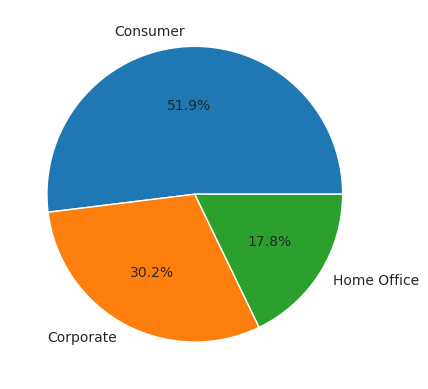

In [95]:
plt.pie(number_of_customers['count'], labels=number_of_customers['Type of Customers'], autopct='%1.1f%%');

In [37]:
# Which Customer type buys the most?
customer_by_order = df.groupby('Segment',observed=True)['Order ID'].count().reset_index()
customer_by_order = customer_by_order.rename(columns={'Order ID': 'Total Order'})
print(customer_by_order)

       Segment  Total Order
0     Consumer         5191
1    Corporate         3020
2  Home Office         1782


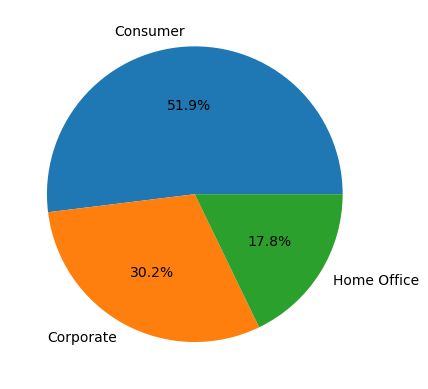

In [40]:
plt.pie(customer_by_order['Total Order'],labels=customer_by_order['Segment'],autopct='%1.1f%%');

### Sales 
* Which Customer Type brings the most revenue?
* Number of Sales made in each time of the day per weekday
* What is the average discount provided per customer segment?
* Which month saw the highest sales?

  Type of Customers         Sales
0          Consumer  1.161401e+06
1         Corporate  7.061464e+05
2       Home Office  4.293718e+05


<BarContainer object of 3 artists>

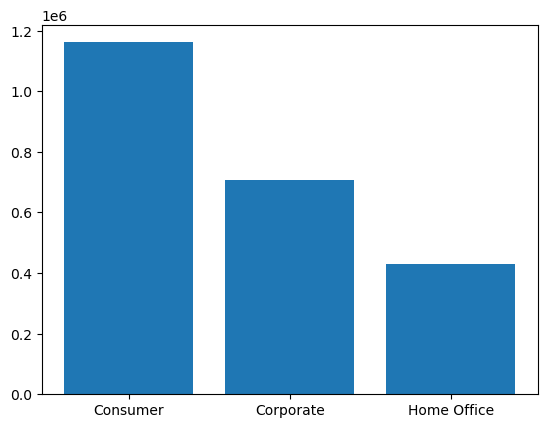

In [42]:
# Which customer type brings the most revenue
sales_per_segment = df.groupby('Segment', observed=True)['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment': 'Type of Customers'})

print(sales_per_segment)

plt.bar(sales_per_segment['Type of Customers'], sales_per_segment['Sales'])

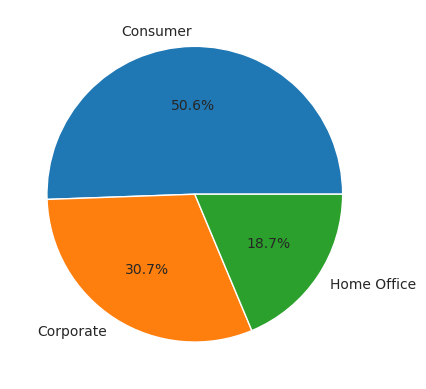

In [97]:
plt.pie(sales_per_segment['Total Revenue'], labels=sales_per_segment['Type of Customers'], autopct='%1.1f%%');

In [80]:
# Which month has the highest sales
sales_per_month = df.groupby('Order Month(N)', observed=True)['Sales'].sum().reset_index()
sales_per_month = sales_per_month.rename(columns={'Sales':'Total Sales'})
sales_per_month = sales_per_month.sort_values(by='Total Sales', ascending=True)
print(sales_per_month)

   Order Month(N)  Total Sales
3        February   59751.2514
4         January   94924.8356
0           April  137480.7566
5            July  147238.0970
6            June  152718.6793
8             May  155028.8117
1          August  159044.0630
10        October  200322.9847
7           March  205005.4888
11      September  307649.9457
2        December  325293.5035
9        November  352461.0710


<BarContainer object of 12 artists>

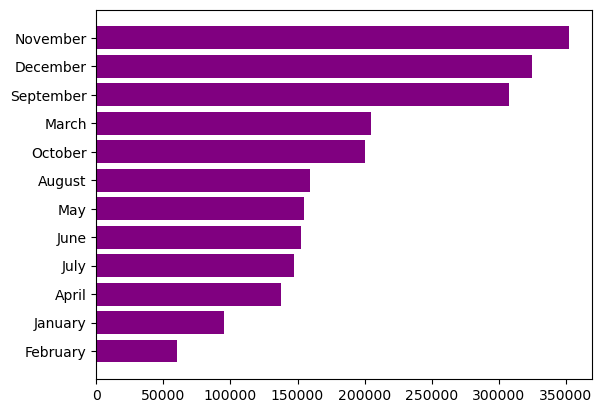

In [81]:
plt.barh(sales_per_month['Order Month(N)'],sales_per_month['Total Sales'], color='purple')

In [46]:
# Number of Sales made each day 
sales_per_weekday = df.groupby('Order Day', observed=True)['Sales'].count().reset_index()
sales_per_weekday = sales_per_weekday.sort_values(by='Sales', ascending=False)
print(sales_per_weekday)

  Order Day  Sales
1       Mon   1871
0       Fri   1818
3       Sun   1710
2       Sat   1655
4       Thu   1463
5       Tue   1106
6       Wed    370


<BarContainer object of 7 artists>

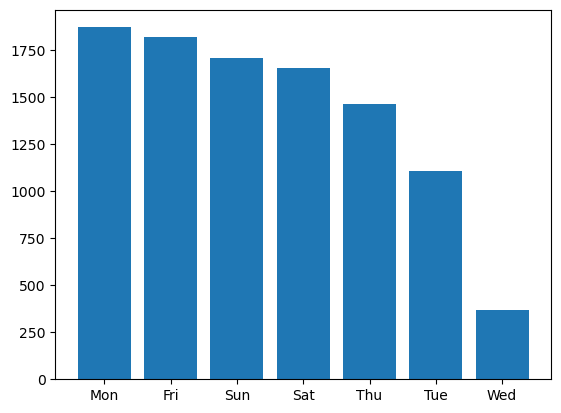

In [47]:
plt.bar(sales_per_weekday['Order Day'], sales_per_weekday['Sales'])

In [56]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Order Month',
       'Order Day', 'Potential Revenue', 'CLV_x', 'CLV_y'],
      dtype='object')

In [63]:
# Average discount provided per customer
discount_per_customer = df.groupby(['Customer ID', 'Customer Name', 'Segment'], observed=True)['Discount'].count().reset_index()
discount_per_customer = discount_per_customer.sort_values(by='Discount',ascending=False)
print(discount_per_customer.head(10)) 

    Customer ID        Customer Name      Segment  Discount
787    WB-21850        William Brown     Consumer        37
606    PP-18955           Paul Prost  Home Office        34
387    JL-15835             John Lee     Consumer        34
482    MA-17560         Matt Abelman  Home Office        34
720    SV-20365          Seth Vernon     Consumer        32
349    JD-15895     Jonathan Doherty    Corporate        32
147    CK-12205  Chloris Kastensmidt     Consumer        32
257    EH-13765         Edward Hooks    Corporate        32
275    EP-13915           Emily Phan     Consumer        31
791    ZC-21910     Zuschuss Carroll     Consumer        31


### Profit 
* Which Customer Type provides the most profit?
* Which products or categories contribute the most overall profit?
* How discount Rates affects overall profitability across different products or categories?

       Segment       Profit
0     Consumer  134119.2092
1    Corporate   91979.1340
2  Home Office   60310.7373


<BarContainer object of 3 artists>

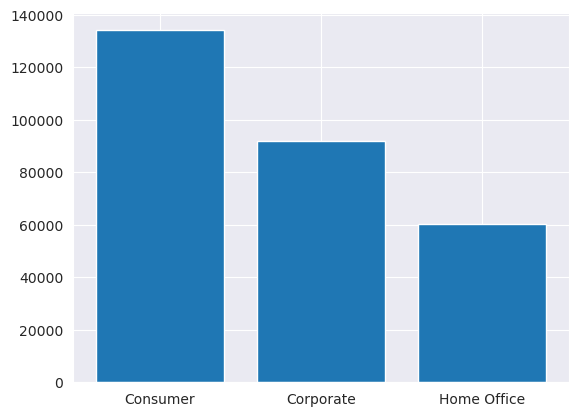

In [98]:
profit_per_segment = df.groupby('Segment')['Profit'].sum().reset_index()

print(profit_per_segment)
plt.bar(profit_per_segment['Segment'], profit_per_segment['Profit'])

In [83]:
# Product or categories contrubution on the profit
profit_per_categories = df.groupby('Category', observed=True)['Profit'].sum().reset_index()
profit_per_categories = profit_per_categories.rename(columns={'Profit':'Total Profit'})
profit_per_categories = profit_per_categories.sort_values(by='Total Profit', ascending=False)
print(profit_per_categories)

          Category  Total Profit
2       Technology   145454.9481
1  Office Supplies   122490.8008
0        Furniture    18463.3316


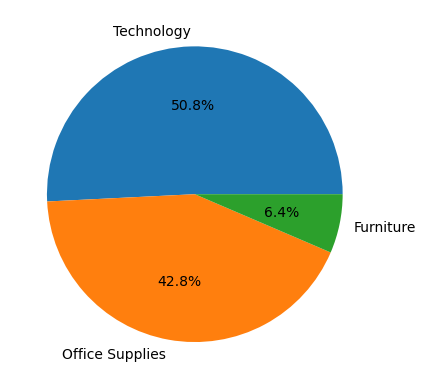

In [92]:
plt.pie(profit_per_categories['Total Profit'], labels=profit_per_categories['Category'], autopct='%1.1f%%');

In [94]:
# Sub Category contribution on profit 
profit_per_sbCatgory = df.groupby('Sub-Category', observed=True)['Profit'].sum().reset_index()
profit_per_sbCatgory = profit_per_sbCatgory.sort_values(by='Profit', ascending=True)
profit_per_sbCatgory = profit_per_sbCatgory.rename(columns={'Profit':'Total Profit'})
print(profit_per_sbCatgory)

   Sub-Category  Total Profit
16       Tables   -17725.4811
4     Bookcases    -3472.5560
15     Supplies    -1189.0995
8     Fasteners      949.5182
11     Machines     3384.7569
10       Labels     5546.2540
2           Art     6527.7870
7     Envelopes     6964.1767
9   Furnishings    13059.1436
1    Appliances    18138.0054
14      Storage    21278.8264
5        Chairs    26602.2251
3       Binders    30221.7633
12        Paper    34053.5693
0   Accessories    41936.6357
13       Phones    44515.7306
6       Copiers    55617.8249


<BarContainer object of 17 artists>

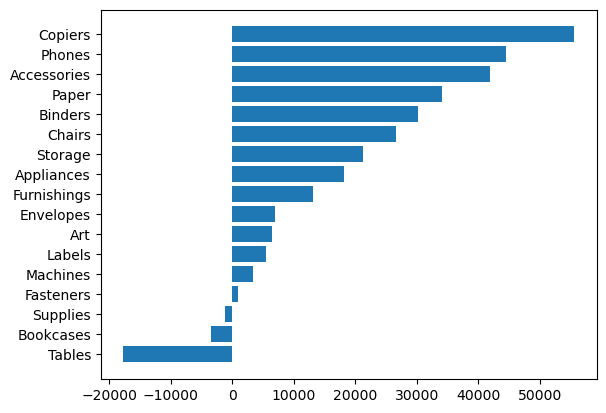

In [96]:
plt.barh(profit_per_sbCatgory['Sub-Category'], profit_per_sbCatgory['Total Profit'])

In [99]:
customer_clv = df.groupby('Customer Name')['CLV'].sum().reset_index()
customer_high_CLV = customer_clv.sort_values(by='CLV', ascending=False)
print(customer_high_CLV.head(10))

     Customer Name           CLV
441   Ken Lonsdale  1.125858e+06
686    Sean Miller  1.028807e+06
689    Seth Vernon  1.005321e+06
312      Greg Tran  9.388048e+05
387       John Lee  9.125507e+05
249   Edward Hooks  9.036518e+05
671   Sanjit Chand  8.521169e+05
169    Clay Ludtke  8.343805e+05
6    Adrian Barton  7.927954e+05
622   Raymond Buch  7.452522e+05


       Segment           CLV
0     Consumer  5.116180e+07
1    Corporate  2.973952e+07
2  Home Office  1.743124e+07


<BarContainer object of 3 artists>

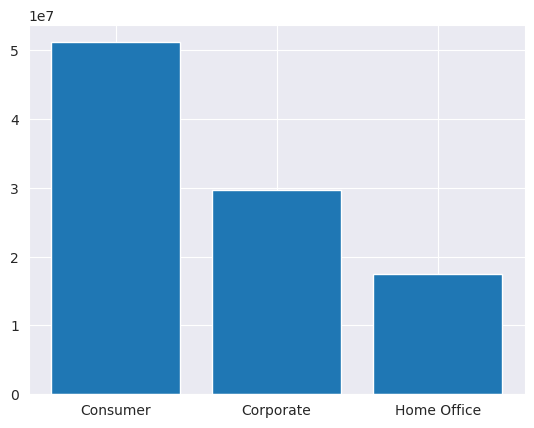

In [100]:
segment_clv = df.groupby('Segment')['CLV'].sum().reset_index()
print(segment_clv)
plt.bar(segment_clv['Segment'], segment_clv['CLV'])

#### The consumer segment significantly outperforms other segments in terms of fianacial metrics:
* It contributes the most to overall Revenue, reflecting its dominant role in driving sales.
* The segment has the Highest Customer Lifetime Value (CLV).
* It also earns highest profits, further confirming its importance to the business's profitability.


In [101]:
# Customer Order Frequency
customer_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'], observed=True)['Order ID'].count().reset_index()

In [102]:
customer_order_frequency.rename(columns={'Order ID': 'Total Orders'}, inplace=True)
repeat_customers = customer_order_frequency[customer_order_frequency['Total Orders'] >= 1]
repeat_customer_sorted = repeat_customers.sort_values(by='Total Orders', ascending=False)
print(repeat_customer_sorted.head(10).reset_index(drop=True))

  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            37
1    PP-18955           Paul Prost  Home Office            34
2    JL-15835             John Lee     Consumer            34
3    MA-17560         Matt Abelman  Home Office            34
4    SV-20365          Seth Vernon     Consumer            32
5    JD-15895     Jonathan Doherty    Corporate            32
6    CK-12205  Chloris Kastensmidt     Consumer            32
7    EH-13765         Edward Hooks    Corporate            32
8    EP-13915           Emily Phan     Consumer            31
9    ZC-21910     Zuschuss Carroll     Consumer            31


In [103]:
# Top Spenders 

customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'],observed=True)['Total Revenue'].sum().reset_index()

In [104]:
top_spenders = customer_sales.sort_values(by='Total Revenue', ascending=False)
print(top_spenders.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Segment  Total Revenue
0    SM-20320         Sean Miller  Home Office      25043.050
1    TC-20980        Tamara Chand    Corporate      19052.218
2    RB-19360        Raymond Buch     Consumer      15117.339
3    TA-21385        Tom Ashbrook  Home Office      14595.620
4    AB-10105       Adrian Barton     Consumer      14473.571
5    KL-16645        Ken Lonsdale     Consumer      14175.229
6    SC-20095        Sanjit Chand     Consumer      14142.334
7    HL-15040        Hunter Lopez     Consumer      12873.298
8    SE-20110        Sanjit Engle     Consumer      12209.438
9    CC-12370  Christopher Conant     Consumer      12129.072


In [105]:
top_customers = top_spenders.head(10)

/tmp/ipykernel_496501/1134946657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_customers['Cumulative Revenue'] = top_customers['Total Revenue'].cumsum()
/tmp/ipykernel_496501/1134946657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_customers['Cumulative Percentage'] = 100 * top_customers['Cumulative Revenue'] / top_customers['Total Revenue'].sum()


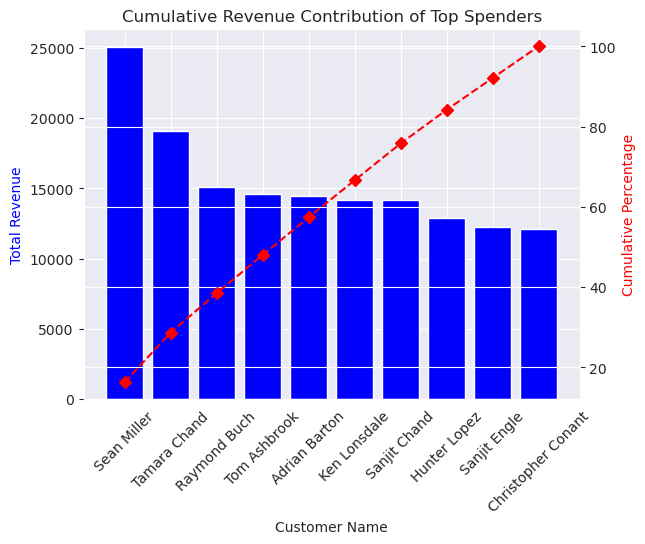

In [106]:
top_customers['Cumulative Revenue'] = top_customers['Total Revenue'].cumsum()
top_customers['Cumulative Percentage'] = 100 * top_customers['Cumulative Revenue'] / top_customers['Total Revenue'].sum()

fig, ax1 = plt.subplots()

ax1.bar(top_customers['Customer Name'], top_customers['Total Revenue'], color='blue')
ax1.set_xlabel('Customer Name')
ax1.set_ylabel('Total Revenue', color='blue')
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.plot(top_customers['Customer Name'], top_customers['Cumulative Percentage'],color='red', marker='D', linestyle='--')
ax2.set_ylabel('Cumulative Percentage', color='red')

plt.xticks(rotation=90)

plt.title('Cumulative Revenue Contribution of Top Spenders')
plt.show();

In [107]:
# Ship Mode

types_of_ship_modes = df['Ship Mode'].unique()
print(types_of_ship_modes)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [108]:
shipping_mode = df['Ship Mode'].value_counts().reset_index()
shipping_mode = shipping_mode.rename(columns={ 'index': 'Use Frequency','Ship Mode': 'Mode of Shipment', 'count': 'Use Frequency'})
print(shipping_mode)

  Mode of Shipment  Use Frequency
0   Standard Class           5967
1     Second Class           1945
2      First Class           1538
3         Same Day            543


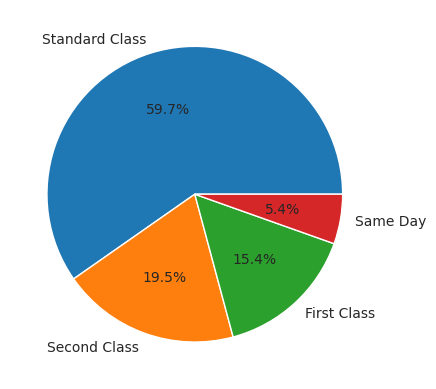

In [109]:
plt.pie(shipping_mode['Use Frequency'], labels=shipping_mode['Mode of Shipment'], autopct='%1.1f%%');

In [110]:
state = df['State'].value_counts().reset_index()
state = state.rename(columns={'index': 'State', 'count': 'Number of Customers'})
print(state.head(20))

             State  Number of Customers
0       California                 2001
1         New York                 1128
2            Texas                  985
3     Pennsylvania                  587
4       Washington                  506
5         Illinois                  492
6             Ohio                  468
7          Florida                  383
8         Michigan                  255
9   North Carolina                  249
10         Arizona                  224
11        Virginia                  224
12         Georgia                  184
13       Tennessee                  183
14        Colorado                  182
15         Indiana                  149
16        Kentucky                  139
17   Massachusetts                  135
18      New Jersey                  130
19          Oregon                  124


In [111]:
city = df['City'].value_counts().reset_index()
print(city.head(20))

             City  count
0   New York City    915
1     Los Angeles    747
2    Philadelphia    537
3   San Francisco    510
4         Seattle    428
5         Houston    377
6         Chicago    314
7        Columbus    221
8       San Diego    170
9     Springfield    163
10         Dallas    157
11   Jacksonville    125
12        Detroit    115
13         Newark     95
14       Richmond     90
15        Jackson     82
16       Columbia     81
17         Aurora     68
18        Phoenix     63
19     Long Beach     61


In [112]:
state_sales = df.groupby(['State'],observed=True)['Total Revenue'].sum().reset_index()
top_state_sales = state_sales.sort_values(by='Total Revenue', ascending=False)
print(top_state_sales.head(10).reset_index(drop=True))

          State  Total Revenue
0    California    457687.6315
1      New York    310876.2710
2         Texas    170188.0458
3    Washington    138641.2700
4  Pennsylvania    116511.9140
5       Florida     89473.7080
6      Illinois     80166.1010
7          Ohio     77976.7640
8      Michigan     76269.6140
9      Virginia     70636.7200


In [113]:
city_sales = df.groupby(['City'],observed=True)['Total Revenue'].sum().reset_index()
top_city_sales = city_sales.sort_values(by='Total Revenue', ascending=False)
print(top_city_sales.head(20).reset_index(drop=True))

             City  Total Revenue
0   New York City    256368.1610
1     Los Angeles    175851.3410
2         Seattle    119540.7420
3   San Francisco    112669.0920
4    Philadelphia    109077.0130
5         Houston     64504.7604
6         Chicago     48539.5410
7       San Diego     47521.0290
8    Jacksonville     44713.1830
9     Springfield     43054.3420
10        Detroit     42446.9440
11       Columbus     38424.8710
12         Newark     28576.1190
13       Columbia     25283.3240
14      Lafayette     25036.2000
15        Jackson     24963.8580
16    San Antonio     21843.5280
17     Burlington     21668.0820
18      Arlington     20214.5320
19         Dallas     20131.9322


In [114]:
state_city_sales = df.groupby(['State', 'City'],observed=True)['Total Revenue'].sum().reset_index()
print(state_city_sales.head(10))

     State           City  Total Revenue
0  Alabama         Auburn       1766.830
1  Alabama        Decatur       3374.820
2  Alabama       Florence       1997.350
3  Alabama         Hoover        525.850
4  Alabama     Huntsville       2484.370
5  Alabama         Mobile       5462.990
6  Alabama     Montgomery       3722.730
7  Alabama     Tuscaloosa        175.700
8  Arizona       Avondale        946.808
9  Arizona  Bullhead City         22.288


# Product
* Types of Product
* Which PRoduct category generates the highest revenue

In [48]:
products = df['Category'].unique()
print(products)

['Furniture' 'Office Supplies' 'Technology']


In [49]:
product_subcategory = df['Sub-Category'].unique()
print(product_subcategory)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [50]:
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
subcategory_count = subcategory_count.sort_values(by='Sub-Category', ascending=False)
print(subcategory_count)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [51]:
subcategory_count_sales = df.groupby(['Category', 'Sub-Category'],observed=True)['Sales'].sum().reset_index()
subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending=False)
print(subcategory_count_sales)

           Category Sub-Category        Sales
16       Technology       Phones  330007.0540
1         Furniture       Chairs  328167.7310
11  Office Supplies      Storage  223843.6080
3         Furniture       Tables  206965.5320
6   Office Supplies      Binders  203412.7330
15       Technology     Machines  189238.6310
13       Technology  Accessories  167380.3180
14       Technology      Copiers  149528.0300
0         Furniture    Bookcases  114879.9963
4   Office Supplies   Appliances  107532.1610
2         Furniture  Furnishings   91705.1640
10  Office Supplies        Paper   78479.2060
12  Office Supplies     Supplies   46673.5380
5   Office Supplies          Art   27118.7920
7   Office Supplies    Envelopes   16476.4020
9   Office Supplies       Labels   12486.3120
8   Office Supplies    Fasteners    3024.2800


In [52]:
product_category = df.groupby(['Category'], observed=True)['Sales'].sum().reset_index()
top_product_category = product_category.sort_values(by='Sales', ascending=False)
print(top_product_category)

          Category        Sales
2       Technology  836154.0330
0        Furniture  741718.4233
1  Office Supplies  719047.0320


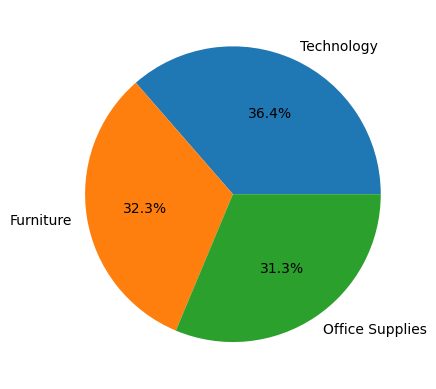

In [53]:
plt.pie(top_product_category['Sales'], labels=top_product_category['Category'], autopct='%1.1f%%');

<BarContainer object of 17 artists>

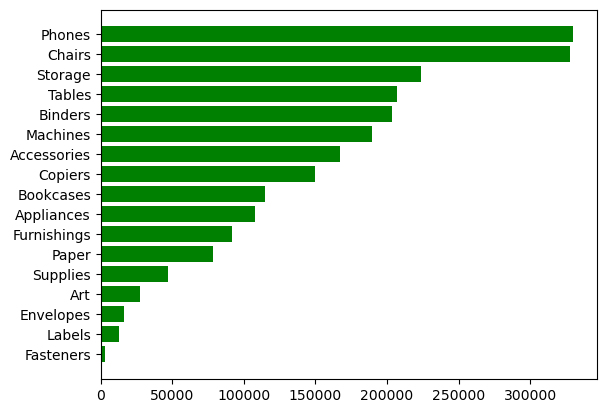

In [54]:
subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending=True)
plt.barh(subcategory_count_sales['Sub-Category'], subcategory_count_sales['Sales'], color='green')

In [122]:
yearly_sales = df.groupby(['Order Year'], observed=True)['Total Revenue'].sum().reset_index()
print(yearly_sales)

   Order Year  Total Revenue
0        2014    483966.1261
1        2015    470532.5090
2        2016    609205.5980
3        2017    733215.2552


<BarContainer object of 4 artists>

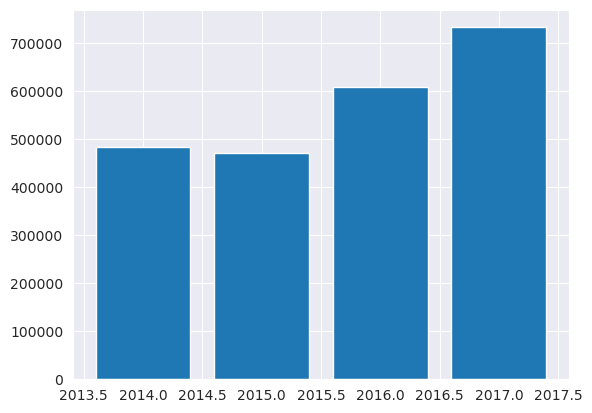

In [63]:
plt.bar(yearly_sales['Order Year'], yearly_sales['Total Revenue'],)

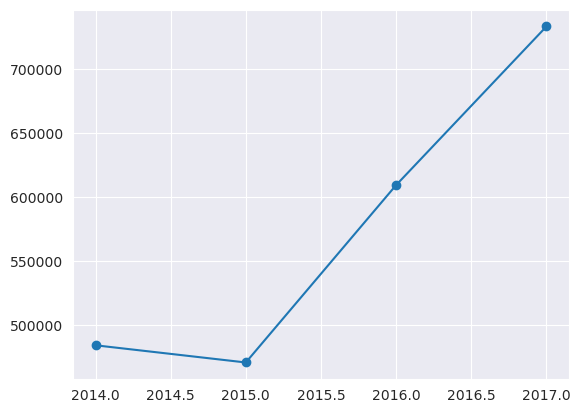

In [66]:
plt.plot(yearly_sales['Order Year'], yearly_sales['Total Revenue'], marker="o")

In [69]:
sales_per_month = df.groupby(['Order Year','Order Month'], observed=True)['Total Revenue'].sum().reset_index()
print(sales_per_month)

    Order Year  Order Month  Total Revenue
0         2014            1     14236.8950
1         2014            2      4519.8920
2         2014            3     55691.0090
3         2014            4     28013.9730
4         2014            5     23648.2870
5         2014            6     34595.1276
6         2014            7     33946.3930
7         2014            8     27909.4685
8         2014            9     81777.3508
9         2014           10     31453.3930
10        2014           11     78628.7167
11        2014           12     69545.6205
12        2015            1     18174.0756
13        2015            2     11951.4110
14        2015            3     38726.2520
15        2015            4     34195.2085
16        2015            5     30131.6865
17        2015            6     24797.2920
18        2015            7     28765.3250
19        2015            8     36898.3322
20        2015            9     64595.9180
21        2015           10     31404.9235
22        2

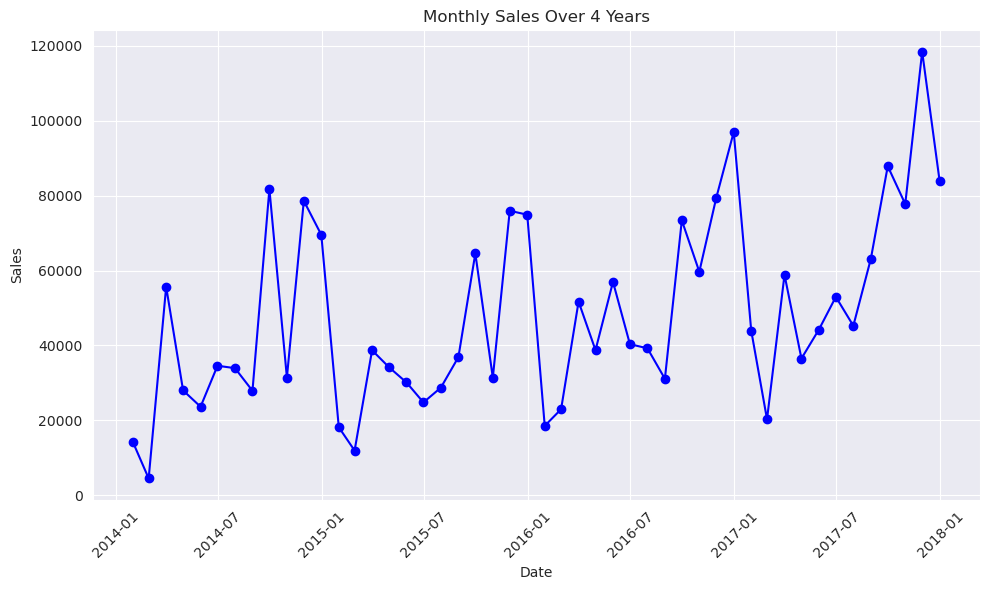

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Set the date column as the index (useful for time series analysis)
#df.set_index('Order Date', inplace=True)

# Step 3: Resample the data by month and sum up sales for each month
monthly_sales = df.resample('ME')['Total Revenue'].sum()

# Step 4: Plot the monthly sales data over 4 years
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')

# Step 5: Customize the plot
plt.title('Monthly Sales Over 4 Years')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
